In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

In [2]:
# 1 - Exploratory data analysis (EDA); identify the data types; conduct data cleansing and modification as needed; info re data types.

In [3]:
# Read data

COVID19 = pd.read_csv("~/Downloads/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
list(COVID19)

['submission_date',
 'state',
 'tot_cases',
 'conf_cases',
 'prob_cases',
 'new_case',
 'pnew_case',
 'tot_death',
 'conf_death',
 'prob_death',
 'new_death',
 'pnew_death',
 'created_at',
 'consent_cases',
 'consent_deaths']

In [4]:
COVID19.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,"297,229","241,035","56,194",0,0,"4,851",NaN,NaN,0,0,03/12/2021 03:20:13 PM,Agree,NaN
1,02/12/2021,UT,"359,641","359,641",0,"1,060",0,"1,785","1,729",56,11,2,02/13/2021 02:50:08 PM,Agree,Agree
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
3,08/22/2020,AR,"56,199",NaN,NaN,547,0,674,NaN,NaN,11,0,08/23/2020 02:15:28 PM,Not agree,Not agree
4,12/06/2021,MP,"1,104","1,104",0,0,0,5,5,0,2,0,12/08/2021 12:00:00 AM,Agree,Agree


In [5]:
COVID19.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths'],
      dtype='object')

In [6]:
COVID19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46920 entries, 0 to 46919
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  46920 non-null  object
 1   state            46920 non-null  object
 2   tot_cases        46920 non-null  object
 3   conf_cases       25673 non-null  object
 4   prob_cases       25601 non-null  object
 5   new_case         46920 non-null  object
 6   pnew_case        43136 non-null  object
 7   tot_death        46920 non-null  object
 8   conf_death       25303 non-null  object
 9   prob_death       25303 non-null  object
 10  new_death        46920 non-null  object
 11  pnew_death       43121 non-null  object
 12  created_at       46920 non-null  object
 13  consent_cases    39095 non-null  object
 14  consent_deaths   39882 non-null  object
dtypes: object(15)
memory usage: 5.4+ MB


In [7]:
COVID19.dtypes

submission_date    object
state              object
tot_cases          object
conf_cases         object
prob_cases         object
new_case           object
pnew_case          object
tot_death          object
conf_death         object
prob_death         object
new_death          object
pnew_death         object
created_at         object
consent_cases      object
consent_deaths     object
dtype: object

In [8]:
COVID19.shape

(46920, 15)

In [9]:
str(COVID19)

'      submission_date state  tot_cases conf_cases prob_cases new_case  \\\n0          03/11/2021    KS    297,229    241,035     56,194        0   \n1          02/12/2021    UT    359,641    359,641          0    1,060   \n2          02/04/2020    AR          0        NaN        NaN        0   \n3          08/22/2020    AR     56,199        NaN        NaN      547   \n4          12/06/2021    MP      1,104      1,104          0        0   \n...               ...   ...        ...        ...        ...      ...   \n46915      06/07/2020    SD      5,438        NaN        NaN       71   \n46916      12/28/2021    NY  1,833,465        NaN        NaN   13,006   \n46917      09/25/2021   RMI          4          4          0        0   \n46918      03/10/2021    SD    113,962        NaN        NaN      209   \n46919      05/27/2021    OH  1,100,312    921,199    179,113      732   \n\n      pnew_case tot_death conf_death prob_death new_death pnew_death  \\\n0             0     4,851        N

In [10]:
COVID19.describe()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
count,46920,46920,46920,25673,25601,46920,43136,46920,25303,25303,46920,43121,46920,39095,39882
unique,782,60,35611,21556,15319,7461,2907,15924,11945,3642,503,313,1776,2,2
top,03/11/2021,KS,0,0,0,0,0,0,0,0,0,0,03/26/2020 04:22:39 PM,Agree,Agree
freq,60,782,3944,657,5954,8711,19711,6281,1818,6594,16269,30367,2970,27900,27452


In [11]:
# Search for missing data

COVID19.isnull().values.any()

True

In [12]:
print(COVID19.isnull().sum())

submission_date        0
state                  0
tot_cases              0
conf_cases         21247
prob_cases         21319
new_case               0
pnew_case           3784
tot_death              0
conf_death         21617
prob_death         21617
new_death              0
pnew_death          3799
created_at             0
consent_cases       7825
consent_deaths      7038
dtype: int64


In [13]:
# Drop Row

to_drop = ['created_at']
COVID19.drop(to_drop, inplace=True, axis=1)

COVID19.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
0,03/11/2021,KS,"297,229","241,035","56,194",0,0,"4,851",NaN,NaN,0,0,Agree,NaN
1,02/12/2021,UT,"359,641","359,641",0,"1,060",0,"1,785","1,729",56,11,2,Agree,Agree
2,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,Not agree,Not agree
3,08/22/2020,AR,"56,199",NaN,NaN,547,0,674,NaN,NaN,11,0,Not agree,Not agree
4,12/06/2021,MP,"1,104","1,104",0,0,0,5,5,0,2,0,Agree,Agree


In [14]:
# Delete NA values

COVID19.dropna(subset=["tot_cases","conf_cases","prob_cases","new_case","pnew_case",
                      "tot_death","conf_death","prob_death","new_death","pnew_death",
                      "consent_cases","consent_deaths"], inplace=True)

COVID19.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
1,02/12/2021,UT,"359,641","359,641",0,"1,060",0,"1,785","1,729",56,11,2,Agree,Agree
4,12/06/2021,MP,"1,104","1,104",0,0,0,5,5,0,2,0,Agree,Agree
5,07/17/2020,MP,37,37,0,1,0,2,2,0,0,0,Agree,Agree
9,12/27/2021,CO,"896,403","820,472","75,931","10,153",543,"10,077","8,922","1,155",3,0,Agree,Agree
10,08/01/2021,GA,"1,187,107","937,515","249,592","3,829","1,144","21,690","18,725","2,965",7,0,Agree,Agree


In [15]:
# Check for duplicate

duplicate = COVID19.duplicated()
print(duplicate.sum())
COVID19[duplicate]

0


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths


In [16]:
# Change "submission_date" data type

COVID19["submission_date"] = pd.to_datetime(COVID19["submission_date"])
print(COVID19.dtypes)

submission_date    datetime64[ns]
state                      object
tot_cases                  object
conf_cases                 object
prob_cases                 object
new_case                   object
pnew_case                  object
tot_death                  object
conf_death                 object
prob_death                 object
new_death                  object
pnew_death                 object
consent_cases              object
consent_deaths             object
dtype: object


In [17]:
# Sort the submission_date in order

COVID19.sort_values("submission_date",inplace=True)
COVID19.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
12450,2020-01-22,AL,0,0,0,0,0,0,0,0,0,0,Agree,Agree
9834,2020-01-22,ME,0,0,0,0,0,0,0,0,0,0,Agree,Agree
42493,2020-01-22,MP,0,0,0,0,0,0,0,0,0,0,Agree,Agree
38642,2020-01-23,MP,0,0,0,0,0,0,0,0,0,0,Agree,Agree
15794,2020-01-23,AL,0,0,0,0,0,0,0,0,0,0,Agree,Agree


In [18]:
# Change "submission_date" to index

COVID19.submission_date = pd.to_datetime(COVID19.submission_date)
COVID19.set_index('submission_date', inplace=True)

COVID19.head()

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
submission_date,,,,,,,,,,,,,
2020-01-22,AL,0,0,0,0,0,0,0,0,0,0,Agree,Agree
2020-01-22,ME,0,0,0,0,0,0,0,0,0,0,Agree,Agree
2020-01-22,MP,0,0,0,0,0,0,0,0,0,0,Agree,Agree
2020-01-23,MP,0,0,0,0,0,0,0,0,0,0,Agree,Agree
2020-01-23,AL,0,0,0,0,0,0,0,0,0,0,Agree,Agree


In [19]:
# Delete 0 values

COVID19[~(COVID19.loc[:,["tot_cases","conf_cases","prob_cases","new_case","pnew_case",
                      "tot_death","conf_death","prob_death","new_death","pnew_death"]] == '0').all(axis=1)]

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
submission_date,,,,,,,,,,,,,
2020-02-03,CA,6,6,0,3,0,0,0,0,0,0,Agree,Agree
2020-02-04,CA,6,6,0,0,0,0,0,0,0,0,Agree,Agree
2020-02-05,CA,6,6,0,0,0,0,0,0,0,0,Agree,Agree
2020-02-06,CA,6,6,0,0,0,0,0,0,0,0,Agree,Agree
2020-02-07,CA,6,6,0,0,0,0,0,0,0,0,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-13,MI,"2,371,788","2,065,912","305,876",0,0,"35,188","32,419","2,769",0,0,Agree,Agree
2022-03-13,PR,"476,063","267,827","208,236",295,145,"4,150","3,455",695,0,0,Agree,Agree
2022-03-13,NYC,"2,287,411","1,946,037","341,374","1,900",258,"39,942","34,441","5,501",15,1,Agree,Agree


In [20]:
# Delete ","

COVID19 = COVID19.replace(',','', regex=True)
print(COVID19)

                state tot_cases conf_cases prob_cases new_case pnew_case  \
submission_date                                                            
2020-01-22         AL         0          0          0        0         0   
2020-01-22         ME         0          0          0        0         0   
2020-01-22         MP         0          0          0        0         0   
2020-01-23         MP         0          0          0        0         0   
2020-01-23         AL         0          0          0        0         0   
...               ...       ...        ...        ...      ...       ...   
2022-03-13         MI   2371788    2065912     305876        0         0   
2022-03-13         PR    476063     267827     208236      295       145   
2022-03-13        NYC   2287411    1946037     341374     1900       258   
2022-03-13         OK   1027663     752427     275236        0         0   
2022-03-13         IL   3045718    3045718          0        0         0   

           

In [21]:
# Change data types - int

COVID19.tot_cases = COVID19.tot_cases.astype(int)
COVID19.conf_cases = COVID19.conf_cases.astype(int)
COVID19.prob_cases = COVID19.prob_cases.astype(int)
COVID19.new_case = COVID19.new_case.astype(int)
COVID19.pnew_case = COVID19.pnew_case.astype(int)
COVID19.tot_death = COVID19.tot_death.astype(int)
COVID19.conf_death= COVID19.conf_death.astype(int)
COVID19.prob_death = COVID19.prob_death.astype(int)
COVID19.new_death = COVID19.new_death.astype(int)
COVID19.pnew_death = COVID19.pnew_death.astype(int)

print(COVID19.dtypes)

state             object
tot_cases          int64
conf_cases         int64
prob_cases         int64
new_case           int64
pnew_case          int64
tot_death          int64
conf_death         int64
prob_death         int64
new_death          int64
pnew_death         int64
consent_cases     object
consent_deaths    object
dtype: object


In [22]:
# 2 - Descriptive Statistical Analysis: mean, median, and range of data during the period provided in the US.  
# Use tables, and graphs, plots, and bar charts to show your results for the top 20 states based on the highest cases reported.  
# Do not print the actual data.  Points will be deducted for printing raw data. Brief interpretation of your results.  

In [23]:
COVID19.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,2.110200e+04,2.110200e+04,21102.000000,21102.000000,21102.000000,21102.000000,21102.000000,21102.000000,21102.000000,21102.000000
mean,5.018884e+05,4.388318e+05,63056.636670,1924.967017,296.314994,8671.483177,7767.345512,904.137665,23.472325,2.709269
std,6.734335e+05,6.160789e+05,98400.485696,4406.507135,793.267182,10995.840457,10222.903805,1319.413288,51.714424,27.588242
min,0.000000e+00,0.000000e+00,0.000000,-4803.000000,-6259.000000,0.000000,0.000000,0.000000,-352.000000,-2594.000000
25%,4.238975e+04,3.885400e+04,15.000000,123.000000,0.000000,772.000000,741.250000,0.000000,0.000000,0.000000
50%,2.343125e+05,2.055460e+05,12179.000000,636.500000,42.000000,4099.000000,3590.000000,232.000000,7.000000,0.000000
75%,7.471500e+05,6.462618e+05,96237.750000,1947.000000,260.000000,12585.250000,10812.000000,1416.000000,25.000000,2.000000
max,4.885289e+06,4.640489e+06,599278.000000,125572.000000,16929.000000,71408.000000,71408.000000,6452.000000,1178.000000,1021.000000


In [24]:
# Mean 

mean = stats.mean(COVID19.tot_cases)
print(mean)

501888.3652260449


In [25]:
mean = stats.mean(COVID19.conf_cases)
print(mean)

438831.803952232


In [26]:
mean = stats.mean(COVID19.prob_cases)
print(mean)

63056.63666951


In [27]:
mean = stats.mean(COVID19.new_case)
print(mean)

1924.9670173443276


In [28]:
mean = stats.mean(COVID19.pnew_case)
print(mean)

296.3149938394465


In [29]:
mean = stats.mean(COVID19.tot_death)
print(mean)

8671.483176950052


In [30]:
mean = stats.mean(COVID19.conf_death)
print(mean)

7767.345512273718


In [31]:
mean = stats.mean(COVID19.prob_death)
print(mean)

904.137664676334


In [32]:
mean = stats.mean(COVID19.new_death)
print(mean)

23.47232489811392


In [33]:
mean = stats.mean(COVID19.pnew_death)
print(mean)

2.7092692635769122


In [34]:
# Median

median = stats.median(COVID19.tot_cases)
print(median)

234312.5


In [35]:
median = stats.median(COVID19.conf_cases)
print(mean)

2.7092692635769122


In [36]:
median = stats.median(COVID19.prob_cases)
print(mean)

2.7092692635769122


In [37]:
median = stats.median(COVID19.new_case)
print(mean)

2.7092692635769122


In [38]:
median = stats.median(COVID19.pnew_case)
print(mean)

2.7092692635769122


In [39]:
median = stats.median(COVID19.tot_death)
print(mean)

2.7092692635769122


In [40]:
median = stats.median(COVID19.conf_death)
print(median)

3590.0


In [41]:
median = stats.median(COVID19.prob_death)
print(median)

232.0


In [42]:
median = stats.median(COVID19.new_death)
print(median)

7.0


In [43]:
median = stats.median(COVID19.pnew_death)
print(median)

0.0


In [44]:
# Range

minimum = min(COVID19.tot_cases)
maximum = max(COVID19.tot_cases)

print(f'The range is {minimum}, {maximum}')

The range is 0, 4885289


In [45]:
minimum = min(COVID19.conf_cases)
maximum = max(COVID19.conf_cases)

print(f'The range is {minimum}, {maximum}')

The range is 0, 4640489


In [46]:
minimum = min(COVID19.prob_cases)
maximum = max(COVID19.prob_cases)

print(f'The range is {minimum}, {maximum}')

The range is 0, 599278


In [47]:
minimum = min(COVID19.new_case)
maximum = max(COVID19.new_case)

print(f'The range is {minimum}, {maximum}')

The range is -4803, 125572


In [48]:
minimum = min(COVID19.pnew_case)
maximum = max(COVID19.pnew_case)

print(f'The range is {minimum}, {maximum}')

The range is -6259, 16929


In [49]:
minimum = min(COVID19.tot_death)
maximum = max(COVID19.tot_death)

print(f'The range is {minimum}, {maximum}')

The range is 0, 71408


In [50]:
minimum = min(COVID19.conf_death)
maximum = max(COVID19.conf_death)

print(f'The range is {minimum}, {maximum}')

The range is 0, 71408


In [51]:
minimum = min(COVID19.prob_death)
maximum = max(COVID19.prob_death)

print(f'The range is {minimum}, {maximum}')

The range is 0, 6452


In [52]:
minimum = min(COVID19.new_death)
maximum = max(COVID19.new_death)

print(f'The range is {minimum}, {maximum}')

The range is -352, 1178


In [53]:
minimum = min(COVID19.pnew_death)
maximum = max(COVID19.prob_death)

print(f'The range is {minimum}, {maximum}')

The range is -2594, 6452


In [54]:
#Sum of total cases by states

sum_total_cases = COVID19.groupby(['state'])['tot_cases'].sum().reset_index()
sum_total_cases

,state,tot_cases
0,AL,345108129
1,AZ,527739409
2,CA,1318659173
3,CO,325692081
4,CT,192933393
5,DE,64274644
6,FSM,1919
7,GA,689783472
8,ID,117488716
9,IL,812217009


<AxesSubplot:xlabel='tot_cases', ylabel='state'>

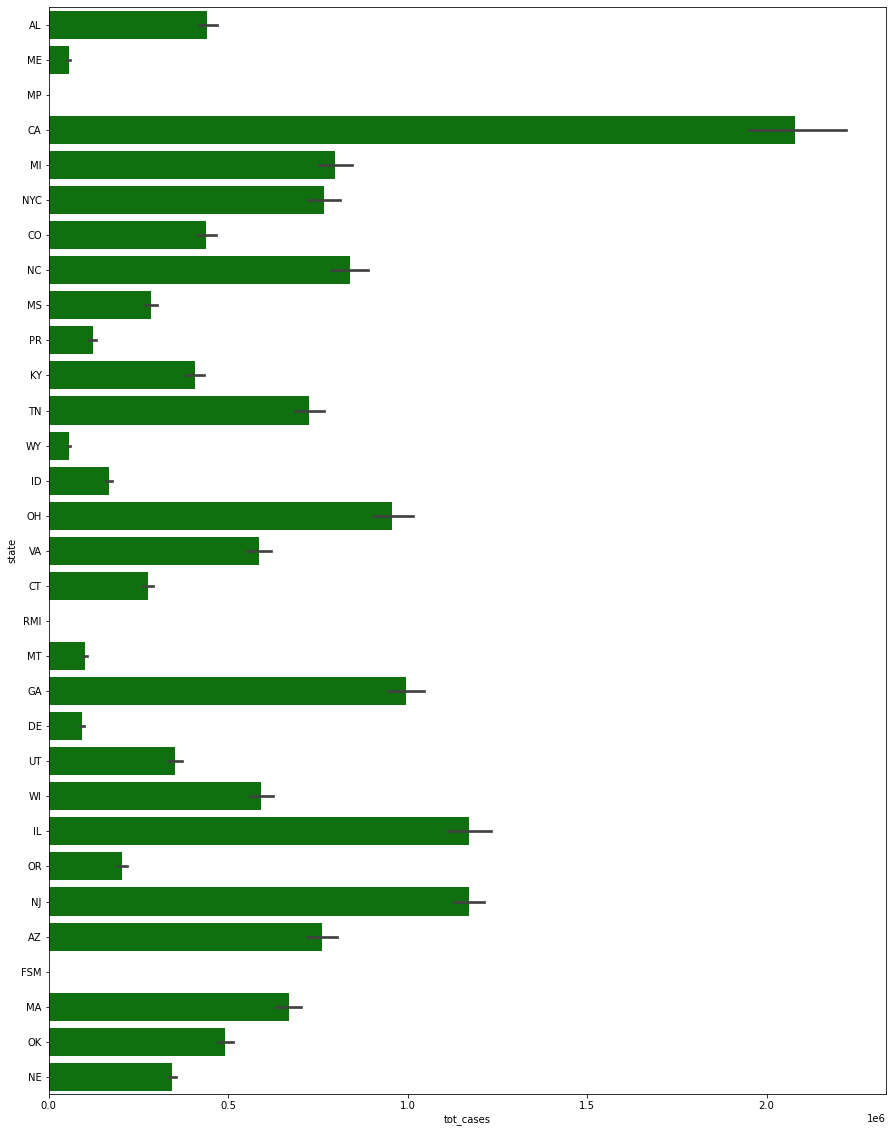

In [55]:
# Total cases by states

fig, ax = plt.subplots(1,1,figsize=(15, 20))
sns.barplot(x="tot_cases", y="state", data=COVID19, color="g")

In [56]:
# TOP 20 States based on the total cases

TOP20 = sum_total_cases.nlargest(20,'tot_cases')
TOP20

,state,tot_cases
2,CA,1318659173
9,IL,812217009
7,GA,689783472
21,OH,668138037
17,NC,621050034
13,MI,593088978
20,NYC,568583138
26,TN,530862828
1,AZ,527739409
19,NJ,518011265


Text(0.5, 0, 'State')

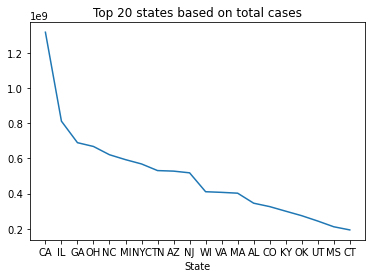

In [66]:
plt.plot(TOP20.state, TOP20.tot_cases)
plt.title("Top 20 states based on total cases")
plt.xlabel('State')

Text(0.5, 0, 'State')

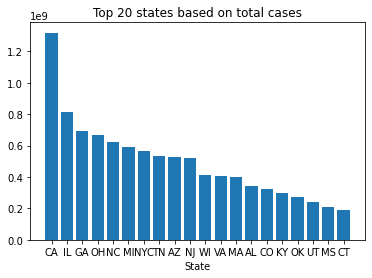

In [65]:
plt.bar(TOP20.state, TOP20.tot_cases)
plt.title("Top 20 states based on total cases")
plt.xlabel('State')

In [67]:
# Results 
# Based on the sum of total cases, CA has the most highest number of total cases which shows the 506,442,164 number of differecne between seoncd highest state IL.

In [68]:
# 3 - Trend analysis over the period provided for the US as well as top 3 states. 
# Use graphs / plots as well as a combined plot for the US vs top 3 states for comparison. Brief interpretation of your results.

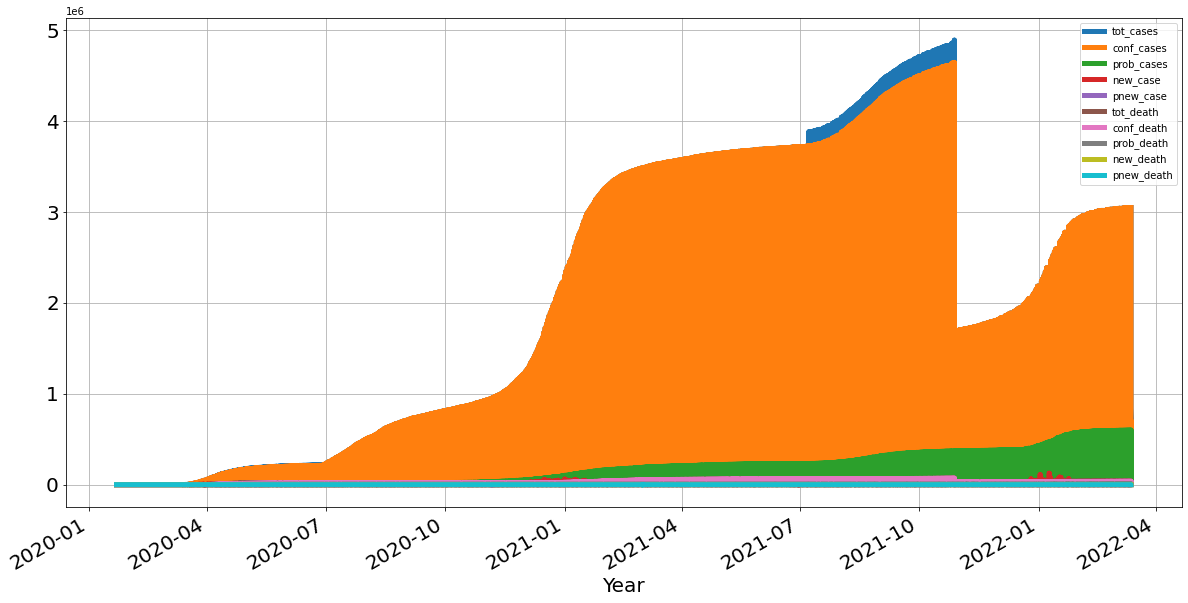

In [69]:
COVID19.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.grid()

In [70]:
# Sum of total cases, new cases and total death by States

Sum = COVID19.groupby(['state'])[('tot_cases','new_case','tot_death')].sum().reset_index()
Sum

/var/folders/g8/yd7hf_jj1w166g47tg63v2zc0000gn/T/ipykernel_36108/2719422011.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Sum = COVID19.groupby(['state'])[('tot_cases','new_case','tot_death')].sum().reset_index()


,state,tot_cases,new_case,tot_death
0,AL,345108129,1286862,6665867
1,AZ,527739409,1982599,9542291
2,CA,1318659173,4708036,20529490
3,CO,325692081,1321634,3908810
4,CT,192933393,709941,4811098
5,DE,64274644,254339,956672
6,FSM,1919,3,0
7,GA,689783472,2458605,11866038
8,ID,117488716,436445,1334261
9,IL,812217009,3016558,14007941


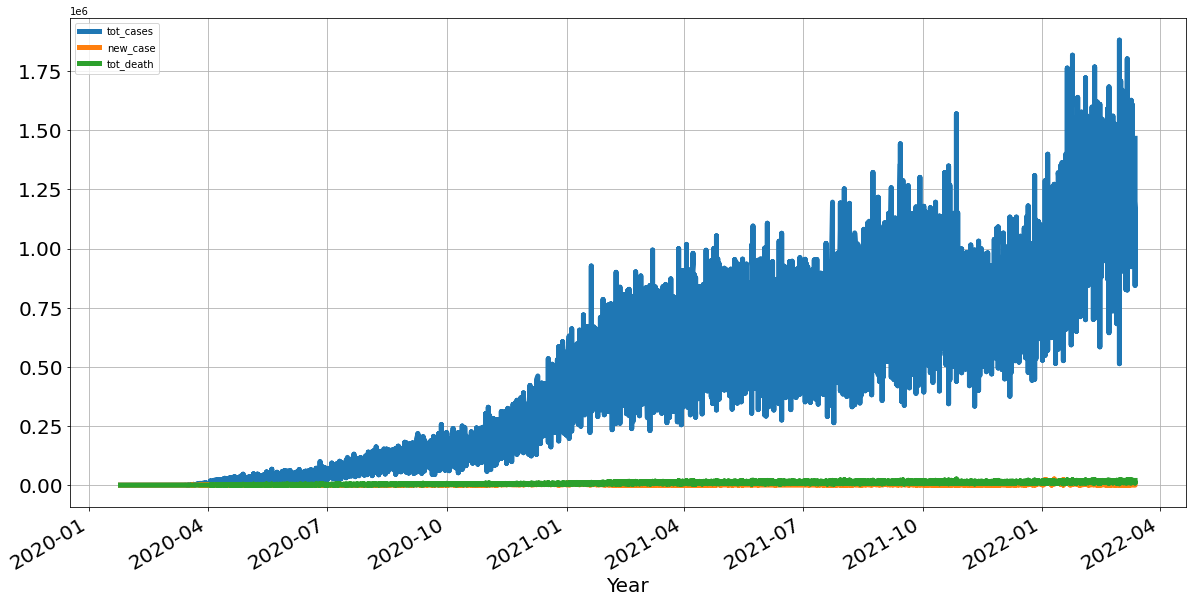

In [71]:
df_rm = pd.concat([COVID19.tot_cases.rolling(12).mean(), 
                   COVID19.new_case.rolling(12).mean(), 
                   COVID19.tot_death.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.grid()
plt.xlabel('Year', fontsize=20);

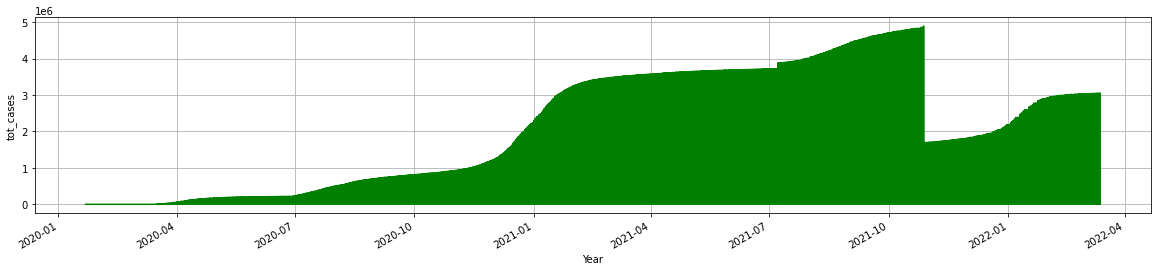

In [72]:
plt.figure(figsize=(20,4))
COVID19['tot_cases'].plot(color='green')
plt.xlabel('Year')
plt.ylabel('tot_cases')
plt.grid()
plt.show()

In [73]:
COVID19['tot_cases'].describe()

count    2.110200e+04
mean     5.018884e+05
std      6.734335e+05
min      0.000000e+00
25%      4.238975e+04
50%      2.343125e+05
75%      7.471500e+05
max      4.885289e+06
Name: tot_cases, dtype: float64

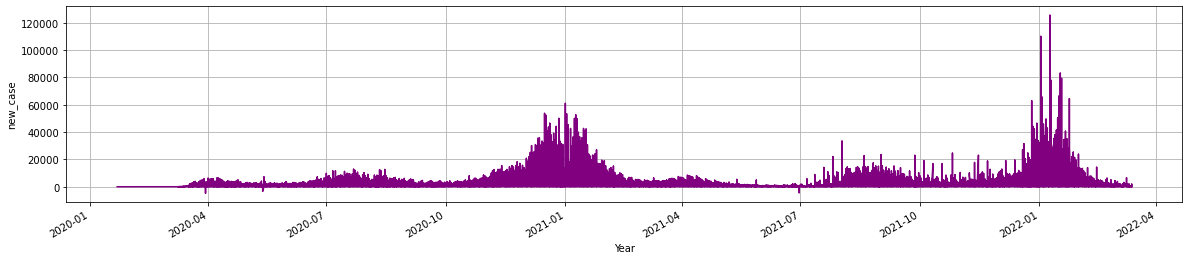

In [74]:
plt.figure(figsize=(20,4))
COVID19['new_case'].plot(color='purple')
plt.xlabel('Year')
plt.ylabel('new_case')
plt.grid()
plt.show()

In [75]:
COVID19['new_case'].describe()

count     21102.000000
mean       1924.967017
std        4406.507135
min       -4803.000000
25%         123.000000
50%         636.500000
75%        1947.000000
max      125572.000000
Name: new_case, dtype: float64

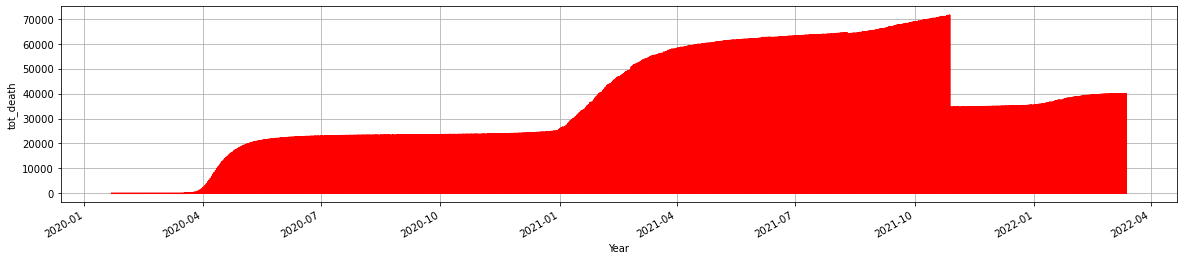

In [76]:
plt.figure(figsize=(20,4))
COVID19['tot_death'].plot(color='red')
plt.xlabel('Year')
plt.ylabel('tot_death')
plt.grid()
plt.show()

In [77]:
COVID19['tot_death'].describe()

count    21102.000000
mean      8671.483177
std      10995.840457
min          0.000000
25%        772.000000
50%       4099.000000
75%      12585.250000
max      71408.000000
Name: tot_death, dtype: float64

In [78]:
# Top 3 States based on the sum of Total cases, new cases and total death

Top3T = Sum.nlargest(3,'tot_cases')
Top3T

,state,tot_cases,new_case,tot_death
2,CA,1318659173,4708036,20529490
9,IL,812217009,3016558,14007941
7,GA,689783472,2458605,11866038


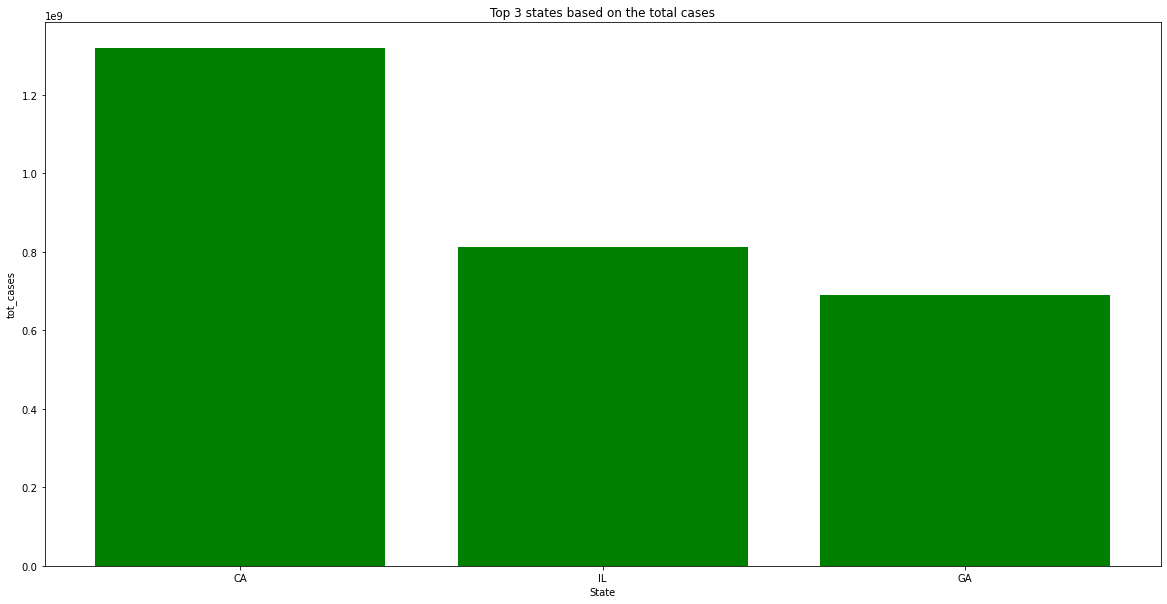

In [79]:
plt.figure(figsize=(20,10))
plt.bar(Top3T.state,Top3T.tot_cases, color='green')
plt.title('Top 3 states based on the total cases')
plt.xlabel('State')
plt.ylabel('tot_cases')
plt.show()

In [80]:
# Top 3 States based on the sum new cases 

Top3N = Sum.nlargest(3,'new_case')
Top3N

,state,tot_cases,new_case,tot_death
2,CA,1318659173,4708036,20529490
9,IL,812217009,3016558,14007941
21,OH,668138037,2652401,10821328


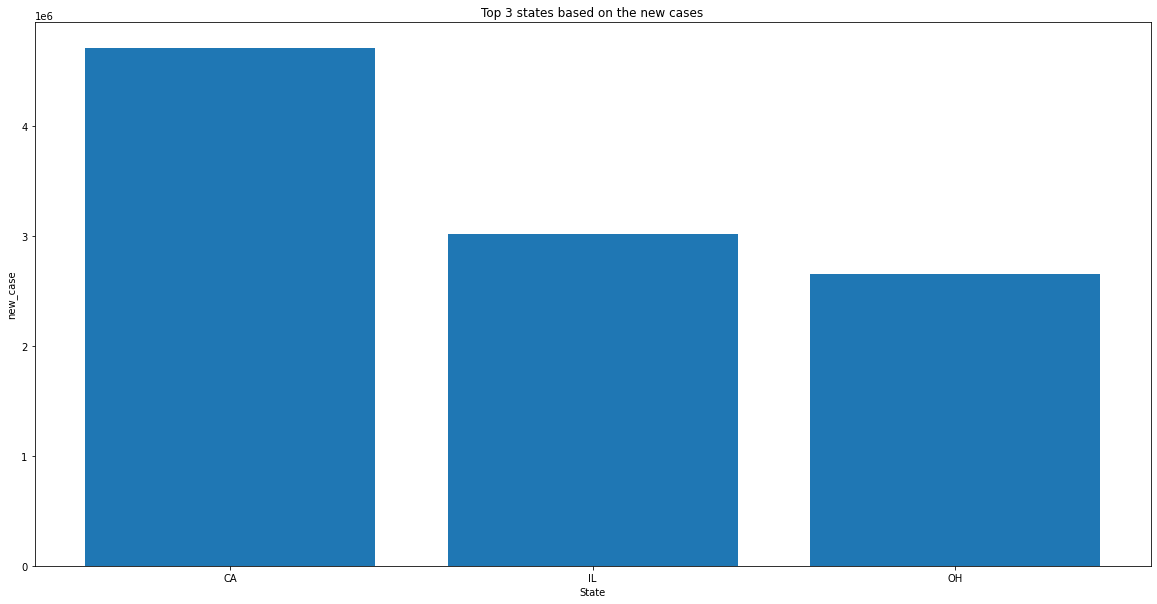

In [81]:
plt.figure(figsize=(20,10))
plt.bar(Top3N.state,Top3N.new_case)
plt.title('Top 3 states based on the new cases')
plt.xlabel('State')
plt.ylabel('new_case')
plt.show()

In [82]:
# Top 3 States based on the total death

Top3D = Sum.nlargest(3,'tot_death')
Top3D

,state,tot_cases,new_case,tot_death
20,NYC,568583138,2287411,20618827
2,CA,1318659173,4708036,20529490
9,IL,812217009,3016558,14007941


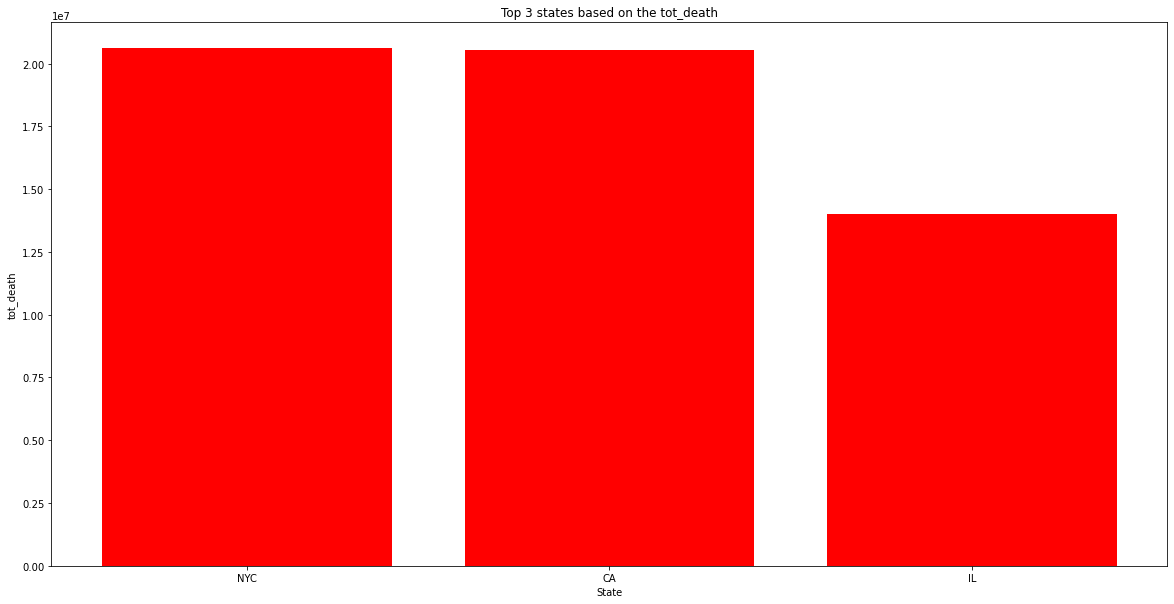

In [83]:
plt.figure(figsize=(20,10))
plt.bar(Top3D.state,Top3D.tot_death, color='red')
plt.title('Top 3 states based on the tot_death')
plt.xlabel('State')
plt.ylabel('tot_death')
plt.show()

In [84]:
# Results
# The color of green shows the trend analysis of total cases, purple shows trend analysis of new cases,
# and red shows the trend analysis of total death. After the year of 2021, the total cases of the COVID19 increased rapdily until October 2021.
# However, the number of total cases dropped since Novemer 2021 till today. Based on the new cases, we faced with two big trends during 2 years.
# First one was december 2020 to Feburary 2021, and December 2021 to Febuary 2022 which can tell we had rapid new cases 
# during the winter seasons with different variants.

# Based on the total death data, US had the most total death number during the year of 2021 and the max number is 71,408.
# California has the most highest number of total cases and new cases. Illinois has the second highest number of total cases and new cases.
# Suprisingly, NYC is not the top 3 state of the total cases but it had the most number of total death. 
# However, California also had very similar number of total death, and the last is Illinois.

In [85]:
# 4 - Weekly rolling average for the US new cases. Brief interpretation of your results.

In [87]:
Sum = COVID19.groupby(['state'])[('new_case')].sum().reset_index()
Sum

,state,new_case
0,AL,1286862
1,AZ,1982599
2,CA,4708036
3,CO,1321634
4,CT,709941
5,DE,254339
6,FSM,3
7,GA,2458605
8,ID,436445
9,IL,3016558


In [88]:
COVID19_datesorted = COVID19.sort_index()
COVID19

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
submission_date,,,,,,,,,,,,,
2020-01-22,AL,0,0,0,0,0,0,0,0,0,0,Agree,Agree
2020-01-22,ME,0,0,0,0,0,0,0,0,0,0,Agree,Agree
2020-01-22,MP,0,0,0,0,0,0,0,0,0,0,Agree,Agree
2020-01-23,MP,0,0,0,0,0,0,0,0,0,0,Agree,Agree
2020-01-23,AL,0,0,0,0,0,0,0,0,0,0,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-13,MI,2371788,2065912,305876,0,0,35188,32419,2769,0,0,Agree,Agree
2022-03-13,PR,476063,267827,208236,295,145,4150,3455,695,0,0,Agree,Agree
2022-03-13,NYC,2287411,1946037,341374,1900,258,39942,34441,5501,15,1,Agree,Agree


<AxesSubplot:xlabel='submission_date'>

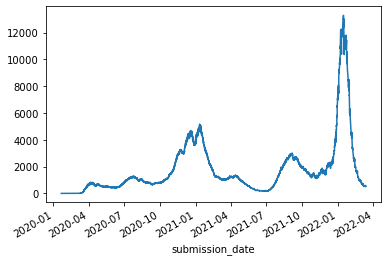

In [105]:
newcase = COVID19.rolling('7D').new_case.mean()
newcase.plot()

Text(0.5, 1.0, 'Weekly Average of US new cases')

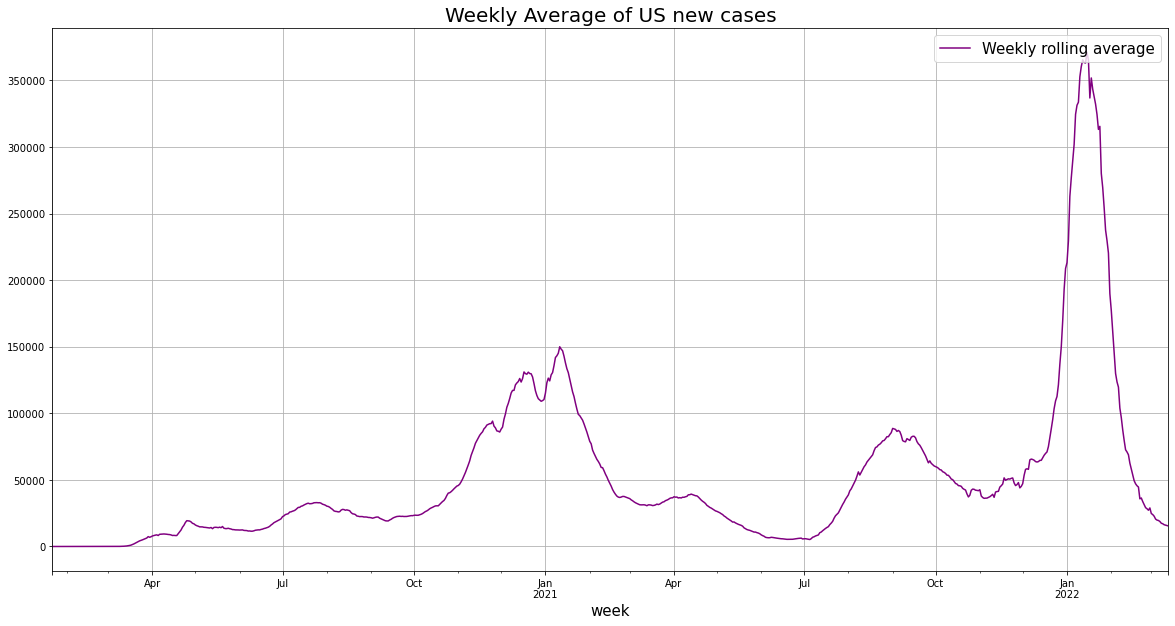

In [104]:
COVID19_datasorted = COVID19.sort_index()

data = COVID19_datasorted['new_case'].groupby('submission_date').sum()
data_WRA = data.rolling(pd.Timedelta('7D')).mean()

plt.figure(figsize=(20,10))
data_WRA.plot(color='purple',label='Weekly rolling average')
plt.legend(loc=1,fontsize=15)
plt.xlabel('week', fontsize=15)
plt.grid()
plt.title('Weekly Average of US new cases',fontsize=20)

In [ ]:
# 5 - Concluding remarks and inferential analysis based on weekly rolling average trend analysis.  
# A brief paragraph summarizing your observations.

In [ ]:
# The above graph shows weekly rolling average of new COVID19 cases from the year of 2020 to 2022 March.
# The weekly rolling average is important since it updates the average of a data set to include all the data in teh set until that point.
# The weekly rolling average shows the data smoother which can be a better idea of the long term trend in traffic.
# The trend of the weekly rolling average is clearly showing that the average of the new COVID19 cases is on the rise overall from the winter season of 2020 to 2021. 
# However, the nwe cases increase appears to be accelerating starting the middle of the year of 2021, and December of 2022.
